# Lecture 2) Graphics and Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #special Graphics tools
import statsmodels.api as sm
import statsmodels.stats.api as sms

## 2.1) Graphics with Python - Basics

The package matplotlib is the most commonly used Python package for generating 2D graphics.
From the notebook environment, the package must first be imported.
It is convenient if the generated graphics are directly embedded in the notebook.
This is ensured by the 'inline' command.

In [2]:
%matplotlib inline

Pyplot is the associated plotting library. 

The commands are very similar to those used in MatLab.
First, you need to import the package into the notebook:

In [3]:
import matplotlib.pyplot as plt # standard

In [4]:
#plt.plot(x, y) # line plot
#plt.show() # <-- shows plot (not necessary if interactive plots are activated)

Otherwise (that is, with the inline command as shown in the previous line), it is sufficient to use

In [5]:
#plt.plot(x, y)

The linked image cannot be displayed.

-> The error message arises in both cases, of course, because we have not defined x and y anywhere :-)

## 2.2) 1D Graphics

### 2.2.1) Graphical representation of point sets

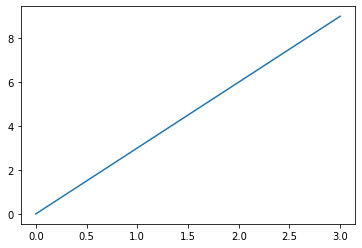

In [6]:
x = np.linspace(0, 3, 20) #20 points from [0,3) - x-values
y = np.linspace(0, 9, 20) #20 points from [0,9) - y-values 
plt.plot(x, y); # durchgezogene Linie

In [7]:
y

array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
       2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
       4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
       7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ])

...now plot the individual points (x,y) that are given on the line...

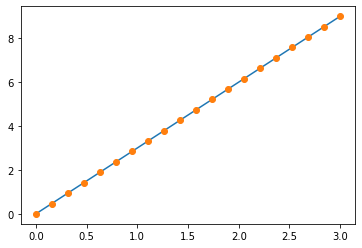

In [8]:
plt.plot(x, y); # Line
plt.plot(x, y, 'o'); # Points

Now, a more detailed example.
To do this, we will first tabulate 256 X values from -π to π (inclusive) as well as the corresponding values of 
sin(x) and cos(x) (Y values). We will create a NumPy array for this.

In [9]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
#np.pi -> Pi from NumPy, endpoint=True -> last point included

C, S = np.cos(X), np.sin(X) #first entry cos(x) second sin(x)

The graphic shows the default settings for a corresponding plot of the tabulated functions 
sin(x) and cos(x)...

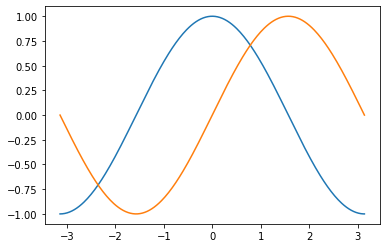

In [10]:
plt.plot(X, C); # cos(x) with X-values
plt.plot(X, S); # sin(x) 

# -> Two or more plots executed in one cell will be overlaid if possible

 ";" after the plot avoids the comments

The graphic can of course be customized to meet specific needs.
The example shows some of the options.

In principle:

- First, a (blank) figure can be created.
- In the first step, general features such as size or resolution are defined.
- All components of the image are defined sequentially in a code cell.
- The final image is then created by overlaying all options/components

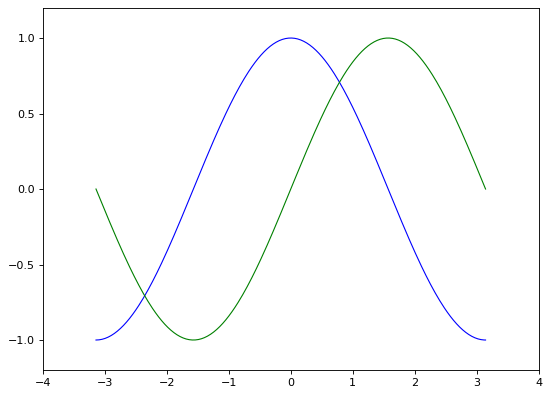

In [11]:
# Plot der Größe 8x6 inches, 80 dots per inch 
plt.figure(figsize=(8, 6), dpi=80)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Cosinus with blue line
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Sinus with green line
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# range for x (limits)
plt.xlim(-4.0, 4.0)

# Marker on x-Axis (x ticks)
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# range for y (limits)
plt.ylim(-1.2, 1.2)

# Marker on y-Axis (y ticks)
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# save graphics (72 dots per inch)
plt.savefig("exercice_2.png", dpi=72)

#Important: The path to the target folder must be specified.

#Default: The graphic is saved in the same location as the notebook

It is also sensible to have meaningful axis labels – in this case, these are the units of π

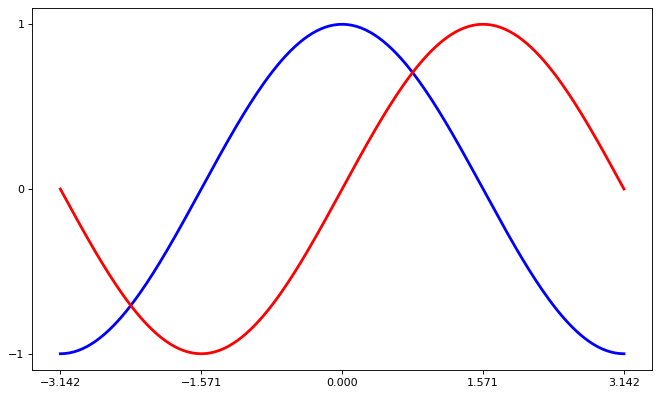

In [12]:
plt.figure(figsize=(10, 6), dpi=80); #size
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-"); #color and thickness
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-");
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]); #Label on x-axis
plt.yticks([-1, 0, +1]); #ticks for y-axis

...better already, but it would be even better if 'Pi' were actually visible

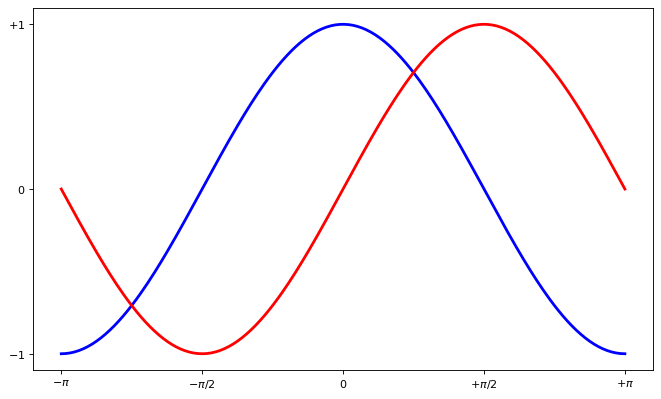

In [13]:
plt.figure(figsize=(10, 6), dpi=80);
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-");
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-");
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], #points
         [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']); #labels with Latex Notation
plt.yticks([-1, 0, +1],[r'$-1$', r'$0$', r'$+1$']);

Axis labels and plot labels are important in any case. 

When presenting real data, they are essential!

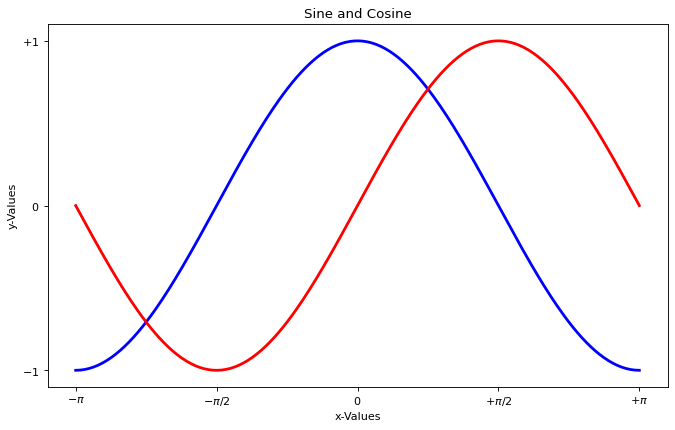

In [14]:
plt.figure(figsize=(10, 6), dpi=80);
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-");
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-");
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], #points
[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']); #labels
    
plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$']);
plt.xlabel('x-Values'); 
plt.ylabel('y-Values'); 
plt.title('Sine and Cosine'); #title of graphics

...finally the legend

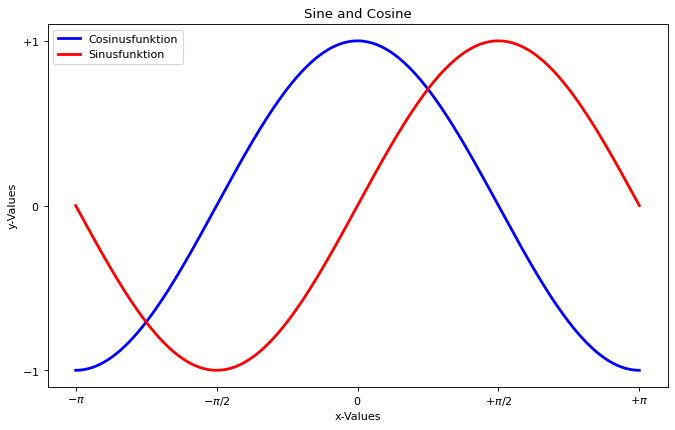

In [15]:
plt.figure(figsize=(10, 6), dpi=80);

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label='Cosinusfunktion'); #<- give label here
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label='Sinusfunktion'); #<- give label here

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], #points
[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']); #labels

plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$']);
plt.xlabel('x-Values');
plt.ylabel('y-Values'); 
plt.title('Sine and Cosine');
plt.legend(loc='upper left'); #show legend

plt.savefig("plots\Lecture2\exercice_2.png", dpi=72)


Practically, you can also add multiple sets of points simultaneously in a single plot command.

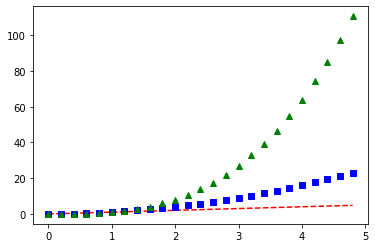

In [16]:
# data sample - step size 0.2 
t = np.arange(0., 5., 0.2)

# different markers 

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^');

In [17]:
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

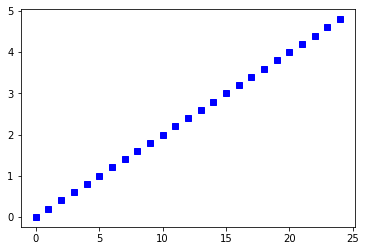

In [18]:
plt.plot(t,'bs');

### 2.2.2) Graphical Representation of Functions

Define a function as previously seen and set the x-values at which the function should be evaluated:

In [19]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t) #define the function e^(-t) + cos(2*Pi*t)

t1 = np.arange(0.0, 5.02, 0.02) #x-values

plotting is simple :-)

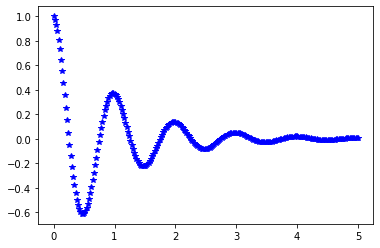

In [20]:
plt.plot(t1,f(t1), 'b*');

shows the function together with cosine

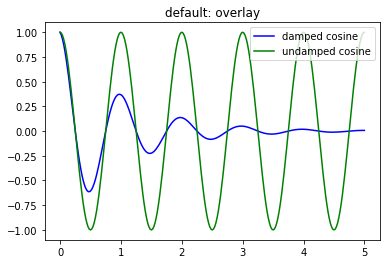

In [21]:
plt.plot(t1,f(t1), 'b', label='damped cosine');
plt.plot(t1,np.cos(2*np.pi*t1),'g', label='undamped cosine')
plt.title('default: overlay')
plt.legend(loc='upper right');

If you want to create separate graphics without overlapping, you can use the subplot command.
subplot(3, 2, 1) means: 

3 rows, 2 columns, and the last number indicates where the image should appear in this grid.

Here’s an example with functions evaluated at the x-values t1:

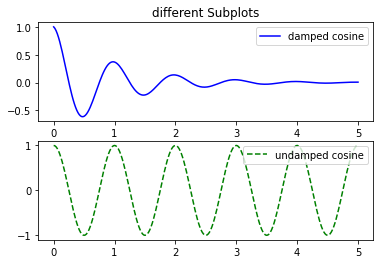

In [22]:
plt.subplot(211);
plt.plot(t1, f(t1), 'b', label="damped cosine");
plt.legend(loc='upper right');
plt.title('different Subplots');

plt.subplot(212);
plt.plot(t1, np.cos(2*np.pi*t1), 'g--', label="undamped cosine"); 
plt.legend(loc='upper right');



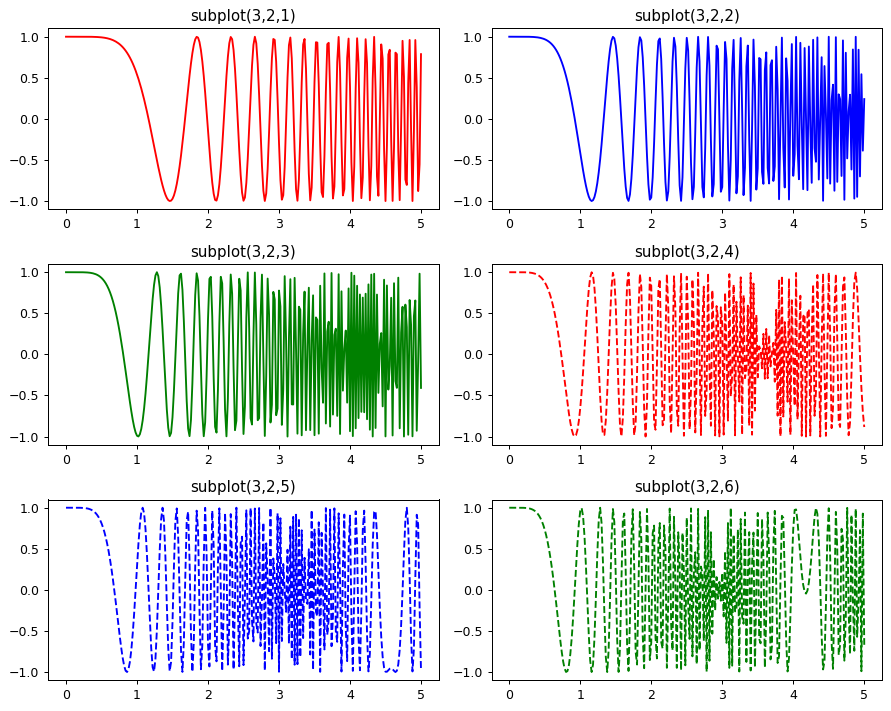

In [23]:
#define Function
def f(t,a):
    return np.cos(a*t**3)

#size
plt.figure(figsize=(10, 8), dpi=90)

#single subplots - from left to right and from top to bottom

plt.subplot(321);                          
plt.plot(t1, f(t1,1), 'r');
plt.title('subplot(3,2,1)');

plt.subplot(322);
plt.plot(t1, f(t1,2), 'b'); 
plt.title('subplot(3,2,2)');

plt.subplot(323);
plt.plot(t1, f(t1,3), 'g');
plt.title('subplot(3,2,3)');

plt.subplot(324); 
plt.plot(t1, f(t1,4), 'r--'); 
plt.title('subplot(3,2,4)');

plt.subplot(325); 
plt.plot(t1, f(t1,5), 'b--'); 
plt.title('subplot(3,2,5)');

plt.subplot(326); 
plt.plot(t1, f(t1,6), 'g--'); 
plt.title('subplot(3,2,6)');

#spacing
plt.tight_layout();
#plt.show()

### Exercise 1)

- define the functions

$f_1(x)= 4+x$, $f_2(x)= 4+x+0.5x^2$ und $f_3(x) = 4+x+0.5x^2+0.2x^3$.

- Plot the three functions together in a meaningful range.
- Add axis labels, a plot label, and appropriate ticks.
- Calculate the function
$f_4(x) = 1/3\cdot(f_1(x)+f_2(x)+f_3(x))$  

and display all four functions as subplots in a single figure.
                

## 2.3) 2D Graphics and special plots

### 2.3.1) Scatter Plots with $\textit{scatter()}$

First, we generate two sets of points.
Each is a random sample from a normal distribution $N(0,1)$

In [24]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

A scatter plot shows the points $(x_i,y_i)$ from both sets $X$ and $Y$ as points in $\mathbb{R}^2$.

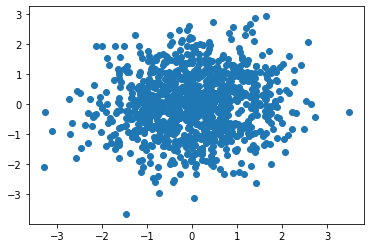

In [25]:
plt.scatter(X,Y); #Scatter Plot 2D

### Exercise 2)

- Take the functions $f_1$ to $f_4$ from Task 1) and generate the point sets $(X,f_i(X))$ for a meaningful choice of X.
- Display the 4 point sets in a scatter plot with different colors.
- Label the graphic appropriately.

### 2.3.2) Contour-Plots with $\textit{plt.contour()}$

Contour-Plots are a good tool to visualize functions $f(x,y)=z$ in a 2-D Graphics.  
For each tuple $(x,y)$ the value $f(x,y)=z$ is shown as a contour-line.  
This creates a kind of map of the function values.

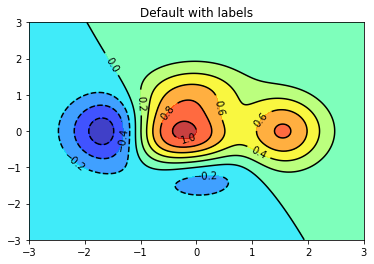

In [26]:
def f(x, y):
    return (1 - x/2+x**5+y**3)*np.exp(-x**2-y**2) # function f(x,y)=z

n = 256 #number of 
x = np.linspace(-3,3,n) # x-values
y = np.linspace(-3,3,n) # y-values


X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black')

plt.clabel(C, inline=1, fontsize=10) 
plt.title('Default with labels');

### Exercise 3) 
- Define the functions $f_1(x,y) = sin(x) + cos(y)$ and $f_2(x,y) = sin(x) \cdot cos(y)$.
- Generate two Contour-Plots for $f_1(x)$ und $f_2(x)$ for x and y from $I=[-Pi,Pi]$. 
- Check the documentation (e.g., http://matplotlib.org/examples/index.html) for ways to style the graphics differently (color of the areas, color and thickness of the contours, labels, size, font type, etc.) and experiment with the design

### 2.3.3) Plots of Arrays with $\textit{plt.imshow()}$

In [27]:
def f(x, y):
     return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2) #function f(x,y)
                 
n = 40
x = np.linspace(-3, 3, n) #x-values
y = np.linspace(-3, 3, n) #y-values

X, Y = np.meshgrid(x, y)

In [28]:
f(X,Y)

array([[-4.07401958e-06, -7.91206460e-06, -1.45798908e-05, ...,
         1.00157350e-05,  5.96531218e-06,  3.28206063e-06],
       [-9.86687245e-06, -1.90860291e-05, -3.49884841e-05, ...,
         2.54712079e-05,  1.50266190e-05,  8.21546256e-06],
       [-2.28221173e-05, -4.39833026e-05, -8.02395827e-05, ...,
         6.15080016e-05,  3.59937087e-05,  1.95718682e-05],
       ...,
       [-1.93963238e-05, -3.55621944e-05, -6.04963175e-05, ...,
         8.12512668e-05,  4.44148168e-05,  2.29976618e-05],
       [-8.14058747e-06, -1.48425649e-05, -2.50396936e-05, ...,
         3.54199983e-05,  1.92700832e-05,  9.94174754e-06],
       [-3.25160068e-06, -5.89043708e-06, -9.84019051e-06, ...,
         1.47554352e-05,  7.98693969e-06,  4.10447954e-06]])

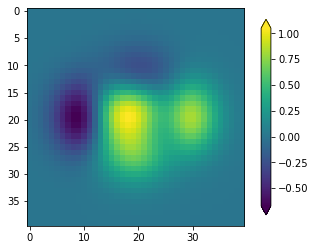

In [29]:
C = plt.imshow(f(X, Y));
plt.colorbar(C, shrink=0.9, extend='both'); #color bar

### Exercise 4) 

- Take the representation from above (plt.imshow()) and experiment with the settings for the color bar.

- Check the help (http://matplotlib.org/examples/index.html) to see what options you can use with the imshow command and test these options.

## 2.4) 3D Plots

For 3D Graphics you need a special Toolbox.

In [30]:
#3D Toolbox
from mpl_toolkits.mplot3d import Axes3D

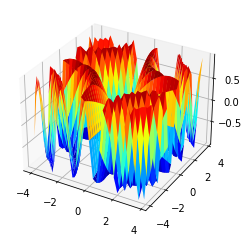

In [31]:
# Create a figure
fig = plt.figure()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Define the x and y values
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)

# Compute Z as the sine of the product of X and Y
Z = np.sin(X * Y)

# Plot the surface
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet');

# Display the plot
#plt.show()  # Make sure to call plt.show() to display the plot in Jupyter

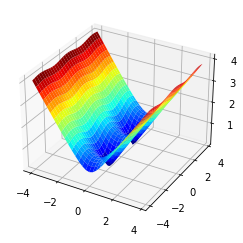

In [32]:
# Create a figure
fig = plt.figure()

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

# Define the x and y values
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

# Create a meshgrid
X, Y = np.meshgrid(X, Y)

# Calculate R based on X and Y
R = np.sqrt(X**2 + np.cos(Y)**2)

# Plot the surface
ax.plot_surface(X, Y, R, rstride=1, cstride=1, cmap='jet');

# Display the plot
#plt.show()  # Ensure to call plt.show() to render the plot in Jupyter

### Exercise 5) 

- Define $f_1(x,y) = sin(x) + cos(y)$ and plot it in a 3D graphics. 
- What options do you have?
 

## 2.5) Read in Data



Python can handle a wide variety of data formats:

- xlsx
- csv



The command 

    check_output 

is very useful.
With this command, you can display files in a target folder.

This makes it easier to find data that you want to read in! :-)

In [33]:
from subprocess import check_output

print(check_output(["ls", "../Data"]).decode("utf8"))

Advertising.csv
AirPassengers.csv
Arbeitslose_Kiel.csv
Arbeitslose_Kiel.xlsx
Auto.csv
College.csv
Credit.csv
Fruits.csv
Heart.csv
Heart_no_NAN.csv
tips.csv



## 2.5.1) Data from Excel


In Python pandas provides the possibility to read in Excel Data. 
For that you have to install openpyxl first.


Data: Arbeitslose in Kiel

Import libraries:

In [34]:
import numpy as np
import pandas as pd
#import xlrd

### Pandas:

Pandas can read Excel files...
This only requires one line of code:

    df = pd.read_excel("file_name.xlsx")

Without any additional specifications, the first worksheet in the Excel file is always read.

If you want to change this, you can use the following code:

    df = pd.read_excel("file_name.xlsx", sheet_name="sheet_name")

In [35]:
DATA_FILE = "../Data/Arbeitslose_Kiel.xlsx"

# Create a Pandas Dataframe
# (read the Excel data with Pandas)
df = pd.read_excel(DATA_FILE)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


...this returns a Pandas 'DataFrame' – a Pandas data format that has many useful features (more on this later).

In [36]:
# print the first five rows
print(df.head())
#print df

   Jahr  Arbeitslose
0  1989        13602
1  1990        12077
2  1991        11136
3  1992        11081
4  1994        13806


## 2.5.2) Read  .csv Data

### The package "csv"

...data from a .csv file is imported from the specified path.
For this, you need the 'csv' package (which is loaded with import csv)

In [38]:
import csv
with open("../Data/AirPassengers.csv", 'r') as f:
    AirPassengers = list(csv.reader(f, delimiter=","))

The 'r' option in the 'open' command simply means 'read', which means the data is read as a text format (ASCII).

The command for 'write' is encoded with 'w'.

It is not always clear which delimiters are used in the .csv file. 
In this case, it's commas (',').

Other possibilities could be 'Tab', ';', '/', and so on.

You can specify this explicitly when reading the file with csv.reader() in the 'delimiter="..."' option.

Here, we also specify that the read object should be treated as a list and give it a name

In [39]:
print (AirPassengers[0]) #1st element in list
print (AirPassengers[1]) #2nd element in list

['Year', 'Month', 'NrOfPassengers']
['1949', '01', '112']


In [40]:
AirPassengers[0:5] #first 5 elements of list

[['Year', 'Month', 'NrOfPassengers'],
 ['1949', '01', '112'],
 ['1949', '02', '118'],
 ['1949', '03', '132'],
 ['1949', '04', '129']]

Currently, the data is available as a list of strings.
This means you can't perform calculations with it right away.

To do so, you need to convert it into a NumPy array or another internal data format (e.g., a Pandas DataFrame).

In [42]:
# Now we convert it into a NumPy array

#and specify that all entries should be floats – we will need this later

#The header in the first row is removed

AirPassengersFloat = np.array(AirPassengers[1:], dtype=float) 

In [43]:
print(AirPassengersFloat[0:10]) #first 10 elements in array

[[1.949e+03 1.000e+00 1.120e+02]
 [1.949e+03 2.000e+00 1.180e+02]
 [1.949e+03 3.000e+00 1.320e+02]
 [1.949e+03 4.000e+00 1.290e+02]
 [1.949e+03 5.000e+00 1.210e+02]
 [1.949e+03 6.000e+00 1.350e+02]
 [1.949e+03 7.000e+00 1.480e+02]
 [1.949e+03 8.000e+00 1.480e+02]
 [1.949e+03 9.000e+00 1.360e+02]
 [1.949e+03 1.000e+01 1.190e+02]]


In [44]:
Passengers=AirPassengersFloat[:,2] #last column 

In [45]:
print(Passengers[0:5])

[112. 118. 132. 129. 121.]


operations on elements...

In [46]:
TotalPassengers = sum(Passengers) #sum() calculates sum of all elements
print(TotalPassengers)

40363.0


In [47]:
n=len(Passengers) #len() shows length
n

144

In [48]:
MeanPassengers=TotalPassengers/n
print(MeanPassengers)

280.2986111111111


### CSV with Pandas

Pandas also has a function to read csv files.

The whole thing is then output in the format of a 'Pandas DataFrame'.

In [49]:
AirPassengers_pandas = pd.read_csv('../Data/AirPassengers.csv')
AirPassengers_pandas[0:7]

,Year,Month,NrOfPassengers
0,1949,1,112
1,1949,2,118
2,1949,3,132
3,1949,4,129
4,1949,5,121
5,1949,6,135
6,1949,7,148


With

    dtypes 

you can display datatypes

In [50]:
AirPassengers_pandas.dtypes

Year              int64
Month             int64
NrOfPassengers    int64
dtype: object

If the file has a header, the read_csv command automatically recognizes it.
You can then conveniently access individual values by referring to the variable name:

In [51]:
#AirPassengers_pandas['NrOfPassengers']
AirPassengers_pandas['Month']

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: Month, Length: 144, dtype: int64

Each variable is assigned a data format. In this case, it's 'integer' for the number of passengers.

In [52]:
Summe=sum(AirPassengers_pandas['NrOfPassengers'])
Summe

40363

WARNING! The data format remains 'integer' unless you explicitly change it.

In [53]:
float(sum(AirPassengers_pandas['NrOfPassengers']))


40363.0

pandas can also handle non numeric data

In [54]:
TipsData = pd.read_csv('../Data/tips.csv')
TipsData.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [55]:
TipsData.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
TipsData['sex'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object

### Exercise 6)

- Read the file Arbeitslose_Kiel.csv using both the csv package and the corresponding Pandas command.
- What data format is recognized in each case?
- Print the first 8 elements from each.
- Calculate the exact mean of the unemployment numbers.

Note: If csv.reader() generates error messages, it could be due to the way the CSV file was created.
Different systems use different (invisible) characters for line endings when generating files.
You can check this directly in the file. If there are issues, using the 'rU' option (universal newline mode) instead of 'r' might help.